<a href="https://colab.research.google.com/github/geethamGT3RS/Cifar_100_image_classification/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *IMPORT REQUIRED LIBRARIES*

In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# *DOWNLOAD CIFAR 100 DATASET*
CIFAR100 data set has 50000 color images. Find more about the data in this link https://www.kaggle.com/datasets/fedesoriano/cifar100

In [2]:
from keras.datasets import cifar100
(train_set,train_label),(test_set,test_label) = cifar100.load_data()
train_set = train_set.astype('float32')/255.0
test_set = test_set.astype('float32')/255.0
from keras.utils import np_utils
train_label = np_utils.to_categorical(train_label,100)
test_label = np_utils.to_categorical(test_label,100)

169001437/169001437 [==============================] - 2s 0us/step


# *MODEL IMPLEMENTATION*
This neural network implementation might take lot of time to process. Use GPU hardware accelrator if present

In [42]:
classify = Sequential()
classify.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
classify.add(Conv2D(32,(3,3),activation='relu',padding='same'))
classify.add(MaxPool2D(pool_size=(2,2)))
classify.add(Dropout(0.25))
classify.add(Conv2D(64,(3,3),activation='relu',padding='same'))
classify.add(MaxPool2D(pool_size=(2,2)))
classify.add(Conv2D(64,(3,3),activation='relu',padding='same'))
classify.add(MaxPool2D(pool_size=(2,2)))
classify.add(Dropout(0.25))
classify.add(Flatten())
classify.add(Dense(512,activation='relu'))
classify.add(Dropout(0.5))
classify.add(Dense(100,activation='softmax'))

In [43]:
classify.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
classify.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [44]:
history = classify.fit(train_set,train_label,batch_size=128, epochs =50,verbose=1)

Epoch 1/50
391/391 [==============================] - 8s 13ms/step - loss: 4.1236 - accuracy: 0.0652
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 3.5178 - accuracy: 0.1626
Epoch 3/50
391/391 [==============================] - 4s 11ms/step - loss: 3.1941 - accuracy: 0.2201
Epoch 4/50
391/391 [==============================] - 5s 12ms/step - loss: 2.9718 - accuracy: 0.2605
Epoch 5/50
391/391 [==============================] - 4s 11ms/step - loss: 2.8003 - accuracy: 0.2984
Epoch 6/50
391/391 [==============================] - 5s 12ms/step - loss: 2.6674 - accuracy: 0.3211
Epoch 7/50
391/391 [==============================] - 5s 12ms/step - loss: 2.5447 - accuracy: 0.3473
Epoch 8/50
391/391 [==============================] - 4s 11ms/step - loss: 2.4520 - accuracy: 0.3634
Epoch 9/50
391/391 [==============================] - 5s 12ms/step - loss: 2.3815 - accuracy: 0.3809
Epoch 10/50
391/391 [==============================] - 4s 11ms/step - loss: 2.3100 - accura

In [45]:
score = classify.evaluate(test_set,test_label,verbose=0)
print('deviation',score[0])
print('accuracy:',score[1])

deviation 1.921912670135498
accuracy: 0.4945000112056732


In [46]:
prediction = classify.predict(test_set)

313/313 [==============================] - 1s 2ms/step


In [47]:
prediction.shape

(10000, 100)

In [48]:
import matplotlib.pyplot as plt

In [49]:
import numpy as np

In [50]:
prediction

array([[3.56399399e-09, 6.81386780e-07, 1.40060321e-03, ...,
        9.56514850e-05, 3.08393908e-04, 6.03448658e-04],
       [1.56494163e-04, 1.70626584e-03, 2.02498515e-03, ...,
        6.69892803e-02, 2.03164225e-03, 8.81755113e-05],
       [4.78205198e-10, 1.29678938e-06, 9.59449972e-05, ...,
        4.74307424e-04, 4.52838758e-05, 5.31356927e-05],
       ...,
       [3.20722734e-06, 2.11919596e-05, 2.30468345e-06, ...,
        1.30464544e-03, 1.20191853e-05, 4.41079203e-04],
       [1.56177471e-08, 5.58390529e-05, 1.19496864e-04, ...,
        3.95753197e-02, 5.22762493e-05, 1.84491873e-02],
       [8.35495361e-04, 2.48557460e-02, 1.00374816e-03, ...,
        6.29287555e-09, 1.01322430e-05, 7.27585793e-05]], dtype=float32)

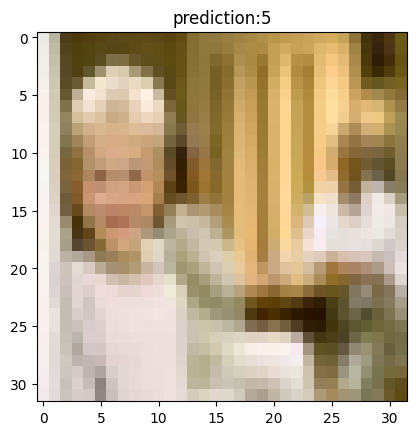

In [52]:
def image_predictor(test):
  
  if test>0 and test <10000 :
    plt.imshow(test_set[test])
    predictions = np.argmax(prediction[test])
    plt.title('prediction:{0}'.format(predictions))
    plt.show()
    
  else :
    test = np.random.randint(1,10000)
    plt.imshow(test_set[test])
    predictions = np.argmax(prediction[test])
    plt.title('prediction:{0}'.format(prediction))
    plt.show()

image_predictor(88)    